### Saudi Aqar prediction


The saudi real estate market is a fast-growing industry <br>
This dataset is collected and scrapped from Aqar website. The chosen cities are Riyadh, Jeddah, Dammam, and Al-Khobar. This dataset focused on the rental houses. It contains information about 3000 properties from various districts



### Step 1: Importing Libraries

In [47]:
# ! conda install -c conda-forge plotnine
# ! conda install -c conda-forge missingno
# ! conda install -c conda-forge category_encoders
# ! conda install -c conda-forge feature_engine


In [48]:
# Helper packages
import pandas as pd   
import numpy as np    
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
from plotnine import ggplot, aes, geom_density, geom_line, geom_point, ggtitle
import missingno as msno

# Modeling pre-processing with scikit-learn functionality
from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

# Modeling pre-processing with non-scikit-learn packages
from category_encoders.ordinal import OrdinalEncoder
from feature_engine.encoding import RareLabelEncoder

# Modeling
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, RepeatedKFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn import preprocessing
from sklearn import compose
from sklearn import cross_decomposition
from sklearn import decomposition
from sklearn import model_selection
from sklearn import linear_model
from sklearn import pipeline

### Step 2: Read Dataset


In [52]:
housing= pd.read_csv('clean_housing.csv')

### Step 3: Explore the Dataset charstaristics


In [53]:
housing

,Unnamed: 0,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,...,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,Rent Frequnecy,Accommodation Types
0,0,الرياض,حي الجنادرية,شرق,246,0,5,5,2,1,...,0,0,0,0,1,0,0,40000,Unkown,Unkown
1,1,جدة,حي بريمان,جنوب,350,0,7,5,2,1,...,0,0,0,1,1,1,0,45000,Unkown,house
2,2,الرياض,حي الرمال,جنوب,280,3,4,3,1,0,...,0,1,0,0,1,0,1,39600,Monthly,floor
3,3,الدمام,حي ضاحية الملك فهد,شمال,250,5,5,5,3,1,...,0,1,0,0,1,0,0,36000,Unkown,house
4,4,الرياض,حي الروضة,جنوب,352,30,7,5,2,1,...,0,1,0,0,1,0,1,80000,Unkown,house
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2969,2969,الدمام,حي ضاحية الملك فهد,غرب,250,0,7,5,3,1,...,0,1,0,1,1,0,0,33000,Monthly,house
2970,2970,الرياض,حي الملز,غرب,300,33,5,5,2,1,...,0,1,0,0,0,0,0,50000,Unkown,house
2971,2971,الدمام,حي ضاحية الملك فهد,شمال,250,0,5,5,3,1,...,0,0,0,0,0,0,0,37000,Unkown,house
2972,2972,الرياض,حي طويق,جنوب غربي,320,3,6,5,2,1,...,0,0,0,1,1,0,0,35000,Monthly,house


In [54]:
housing.drop('Unnamed: 0', inplace=True, axis=1)

### Step 4: feature engineering 


the data consist of catogrical and numarical features, since we will use the linear regression, we will encode the catogrical features

In [56]:
# Encoding categorical data 
def encodingColumns(dataFr,column):
    ohe = OneHotEncoder()
    feature_array = ohe.fit_transform(dataFr[[column]]).toarray()
    feature_lable = ohe.categories_
    feature = pd.DataFrame(feature_array,columns=feature_lable)
    dataFr = pd.concat([dataFr,feature],axis=1)
    return dataFr

encoded_housing = encodingColumns(housing,"city")
encoded_housing = encodingColumns(encoded_housing,"Accommodation Types")


In [ ]:
encoded_housing.drop(['Accommodation Types','city','Rent Frequnecy','district','front'], inplace=True, axis=1)

In [63]:
encoded_housing

,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,...,fireplace,price,"( الخبر,)","( الدمام,)","( الرياض,)","( جدة,)","(Unkown,)","(apartment,)","(floor,)","(house,)"
0,حي الجنادرية,شرق,246,0,5,5,2,1,1,0,...,0,40000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,حي بريمان,جنوب,350,0,7,5,2,1,1,0,...,0,45000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,حي الرمال,جنوب,280,3,4,3,1,0,1,0,...,1,39600,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,حي ضاحية الملك فهد,شمال,250,5,5,5,3,1,1,0,...,0,36000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,حي الروضة,جنوب,352,30,7,5,2,1,1,0,...,1,80000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2969,حي ضاحية الملك فهد,غرب,250,0,7,5,3,1,1,0,...,0,33000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2970,حي الملز,غرب,300,33,5,5,2,1,0,1,...,0,50000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2971,حي ضاحية الملك فهد,شمال,250,0,5,5,3,1,0,0,...,0,37000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2972,حي طويق,جنوب غربي,320,3,6,5,2,1,1,0,...,0,35000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [64]:
encoded_housing.columns

Index([    'district',        'front',         'size', 'property_age',
           'bedrooms',    'bathrooms',  'livingrooms',      'kitchen',
             'garage',  'driver_room',    'maid_room',    'furnished',
                 'ac',         'roof',         'pool',    'frontyard',
           'basement',       'duplex',       'stairs',     'elevator',
          'fireplace',        'price',    (' الخبر',),   (' الدمام',),
         (' الرياض',),      (' جدة',),    ('Unkown',), ('apartment',),
           ('floor',),     ('house',)],
      dtype='object')

### Step 5 : Building Modals 

##### data spliting

In [77]:
train, test = train_test_split(encoded_housing, train_size=0.8, random_state=123)
# separate features from labels and only use numeric features
# Create X_train,y_train
X_train = train.drop("price", axis=1)
y_train = train[["price"]]

this plot demonstrate the similarity between the price in the train and the test

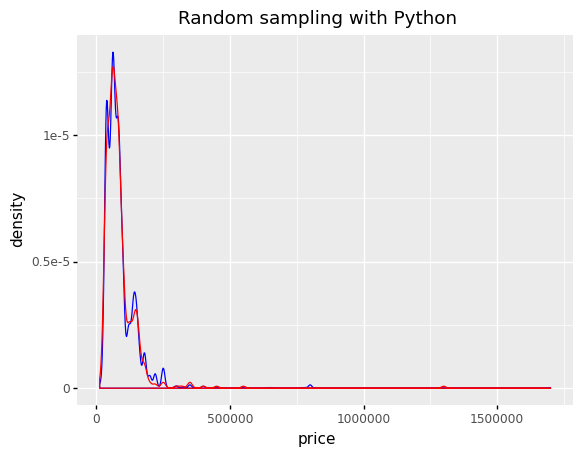

<ggplot: (8762514447150)>

In [66]:
#
(ggplot(train, aes('price'))
 + geom_density(color = "blue")
 + geom_density(data = test, color = "red")
 + ggtitle("Random sampling with Python"))

####  Simple linear regression
we chose to built it between the size and the price since it has the strongest relationship

In [67]:
# create linear regression model object
lm_mod = linear_model.LinearRegression()

# fit linear model with only size feature
lm_fit = lm_mod.fit(X_train[["size"]], y_train)

Text(1500, 3000, 'y = 35453.39 + 142.77x')

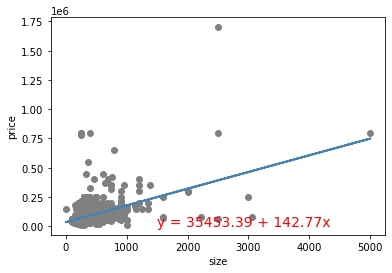

In [68]:
x_train = train["size"]
y_train = train["price"]

a, b = np.polyfit(x_train, y_train, 1)
plt.scatter(x_train, y_train, color='grey')

plt.plot(x_train, a*x_train+b, color='steelblue', linestyle='-', linewidth=2)
plt.xlabel('size')
plt.ylabel('price')

plt.text( 1500,3000,'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14, color = 'red')

In [69]:
print ('Coefficients: ', lm_fit.coef_)
print ('Intercept: ',lm_fit.intercept_)

Coefficients:  [[142.77043732]]
Intercept:  [35453.39334469]


#### multi feature linear regression 
all feature are included in this model

In [78]:

# create linear regression model object
lm_mod = linear_model.LinearRegression()

# fit linear model with all features
lm_fit = lm_mod.fit(X_train.values, y_train)

In [89]:
print ('Coefficients: ', lm_fit.coef_)
print ('Intercept: ',lm_fit.intercept_)

Coefficients:  [[ 1.22603840e+02  1.14962048e+01 -2.01395972e+03 -2.67014155e+03
   6.17046595e+03  9.91869342e+03 -3.73092464e+03  1.29184287e+04
   1.90867201e+04  1.67254139e+04  1.44984416e+04 -8.24614133e+03
   2.60666981e+04  3.37015648e+03  3.85006698e+04  2.13862490e+03
   3.61885905e+03  4.93751196e+03 -3.48498205e+03 -1.08610789e+02
  -1.45818891e+04  7.93093617e+03  6.75956368e+03  1.28019280e+04
  -4.52777421e+03 -3.79939355e+03 -4.47476021e+03]]
Intercept:  [8732.15697958]


we chose 4 features that we think that can affect the price to include in this model 

In [90]:
# create linear regression model object
lm_mod = linear_model.LinearRegression()

# fit linear model with only size feature
lm_fit = lm_mod.fit(X_train[["size",'ac','property_age','furnished']], y_train)

In [91]:
print ('Coefficients: ', lm_fit.coef_)
print ('Intercept: ',lm_fit.intercept_)

Coefficients:  [[  137.53061363 32555.7643427    361.93944974 14484.18556582]]
Intercept:  [15362.91945493]


## Step 6 - evaluating and selecting the model



#### Assessing model accuracy


In [83]:
# feature sets to compare across
feature_set1 = X_train[["size"]]
feature_set2 = X_train[["size", "ac","property_age",'furnished']]
feature_set3 = X_train
feature_sets = {'lm1': feature_set1, 'lm2': feature_set2, 'lm3': feature_set3}

# define loss function
loss = 'neg_root_mean_squared_error'

# create 10 fold CV object
kfold = model_selection.KFold(n_splits=15, random_state=8451, shuffle=True)

# object to store CV RMSE results
results = {}

for name, feat in feature_sets.items():
  # create LM model object
  lm_mod = linear_model.LinearRegression()

  # execute and score the cross validation procedure
  cv_results = model_selection.cross_val_score(
    estimator=lm_mod, 
    X=feat.values, 
    y=y_train, 
    cv=kfold, 
    scoring=loss
    )
  results[name] = np.absolute(cv_results.mean())

In [85]:
pd.DataFrame.from_dict(
  results,
  orient='index',
  columns=['RMSE']
  ).rename_axis('n_components').reset_index()

,n_components,RMSE
0,lm1,61688.041195
1,lm2,58849.395523
2,lm3,54558.612806


we chose the third model that includes the full features set because it has the least RMSE (Root Mean Square Error)

## Step 6 : testing

we are going to test the test set on the chosen model

In [86]:
test

,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,maid_room,furnished,...,fireplace,price,"( الخبر,)","( الدمام,)","( الرياض,)","( جدة,)","(Unkown,)","(apartment,)","(floor,)","(house,)"
1732,375,9,5,5,2,1,0,1,1,0,...,0,100000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
645,350,0,7,5,3,1,1,1,1,0,...,0,100000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
511,330,0,6,4,2,1,0,0,0,0,...,1,37000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
613,400,0,5,5,2,1,1,0,0,0,...,0,80000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
906,375,4,4,4,2,1,1,1,1,1,...,0,110000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1582,437,0,7,5,2,0,1,0,1,0,...,1,60000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1144,200,0,7,5,2,1,1,0,1,1,...,0,60000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2761,437,0,7,5,2,1,1,0,1,0,...,1,60000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1224,260,5,5,5,2,1,1,0,0,0,...,0,110000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [87]:
from sklearn.metrics import r2_score

# create linear regression model object
lm_mod = linear_model.LinearRegression()

# fit linear model with all features
lm_fit = lm_mod.fit(X_train.values, y_train)

X_test = test.drop("price", axis=1)
y_test = np.asanyarray(test[['price']])

y_predicted = lm_mod.predict(X_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_test - y_predicted)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_test - y_predicted) ** 2))
print("R2-score: %.2f" % r2_score(y_test , y_predicted) ) 
#R2= 1- SSres / SStot
#  where SSres is the sum of squares of the residual errors.
# SStot is the total sum of the errors.

Mean absolute error: 25740.18
Residual sum of squares (MSE): 3889380639.72
R2-score: 0.27


# conclusion 

after preforming the test on the selected model, the results turned out not as expected 